# Рубежный контроль №1 (весна 2025 года)
**Студент:** Беспалова Виктория Андреевна

**Группа:** ИУ5-63Б

|Номер задания|Номер задачи|Номер набора данных, указанного в задаче|
|:---:|:---:|:---:|
|4|1|4|

**Дополнительные требования:**
Для произвольной колонки данных построить график "Ящик с усами (boxplot)".

**Задача №1**  
Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.

## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Загрузка данных

1. age - возраст  
2. sex - пол  
3. chest pain type (4 values) - тип грудной боли (4 категории)  
4. resting blood pressure - артериальное давление в состоянии покоя  
5. serum cholestoral in mg/dl - уровень холестерина в сыворотке крови (мг/дл)  
6. fasting blood sugar > 120 mg/dl - уровень глюкозы в крови натощак > 120 мг/дл  
7. resting electrocardiographic results (values 0,1,2) - результаты электрокардиограммы в покое (значения 0, 1, 2)  
8. maximum heart rate achieved - максимальная достигнутая частота сердечных сокращений  
9. exercise induced angina - стенокардия, вызванная физической нагрузкой  
10. oldpeak = ST depression induced by exercise relative to rest - депрессия сегмента ST, вызванная физической нагрузкой по сравнению с состоянием покоя  
11. the slope of the peak exercise ST segment - наклон пикового сегмента ST при максимальной физической нагрузке  
12. number of major vessels (0-3) colored by flourosopy - количество крупных сосудов (0-3), визуализированных с помощью флюороскопии  
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect (0 = нормально; 1 = фиксированный дефект; 2 = обратимый дефект)  
Имена и номера социального страхования пациентов были недавно удалены из базы данных и заменены фиктивными значениями.

In [2]:
data = pd.read_csv('heart.csv', sep=",")

## Основные характеристики датасета

In [3]:
# Первые 5 строк датасета
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# Размер датасета - 1025 строк, 14 колонок
data.shape

(1025, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
data.isnull().sum() # -> в датасете отсутствуют пропуски 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [19]:
numeric_var = ["age", "trestbps", "chol", "thalach", "oldpeak"]
categoric_var = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal", "target"]

In [21]:
data[numeric_var].describe()

,age,trestbps,chol,thalach,oldpeak
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512
std,9.072290,17.516718,51.59251,23.005724,1.175053
min,29.000000,94.000000,126.00000,71.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000
75%,61.000000,140.000000,275.00000,166.000000,1.800000
max,77.000000,200.000000,564.00000,202.000000,6.200000


In [17]:
# Определим уникальные значения для целевого признака
data['target'].unique()

array([0, 1])

Целевой признак является бинарным и содержит только значения 0 и 1.

## Ящик с усами

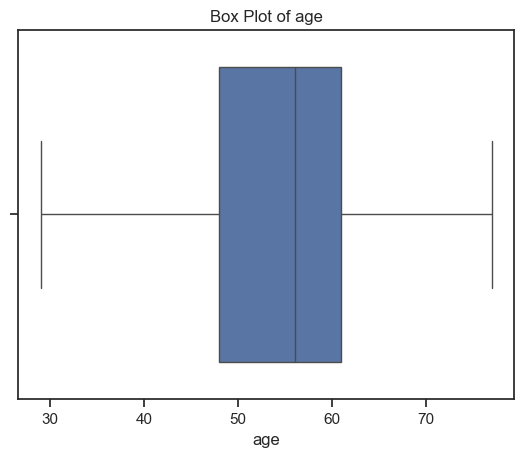

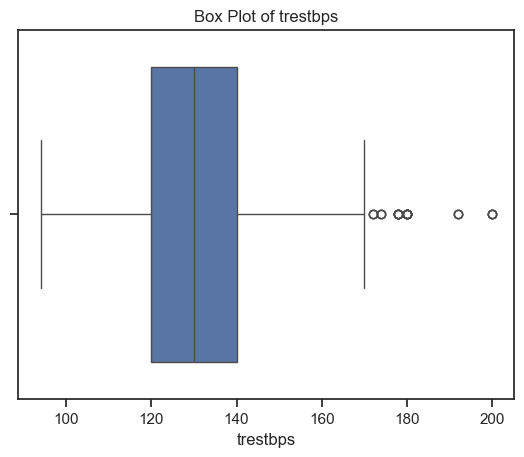

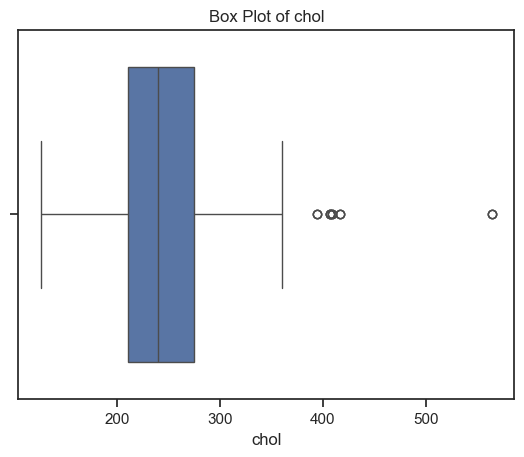

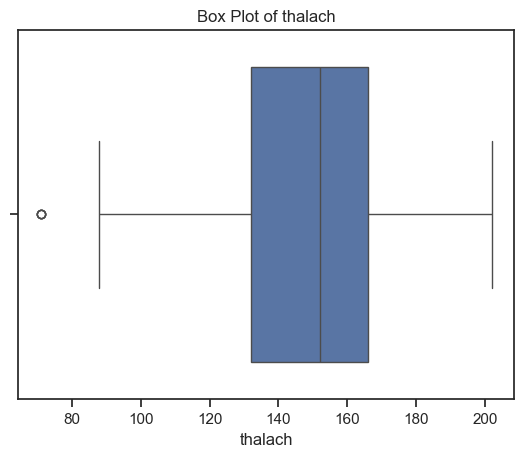

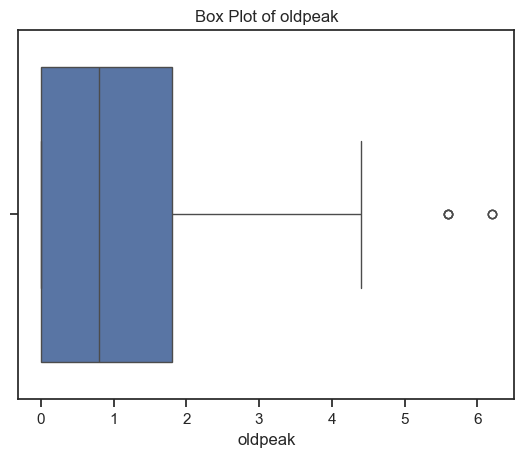

In [20]:
for feature in numeric_var:
    sns.boxplot(x=feature, data=data)
    plt.title(f'Box Plot of {feature}')
    plt.show()

## Корреляционный анализ

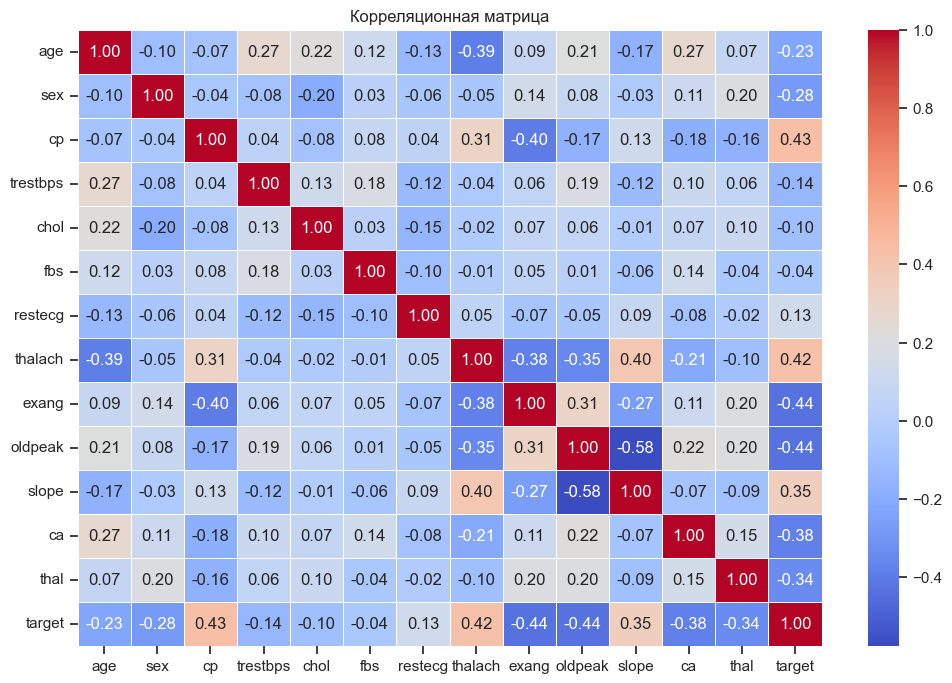

In [13]:
correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Корреляционная матрица")
plt.show()

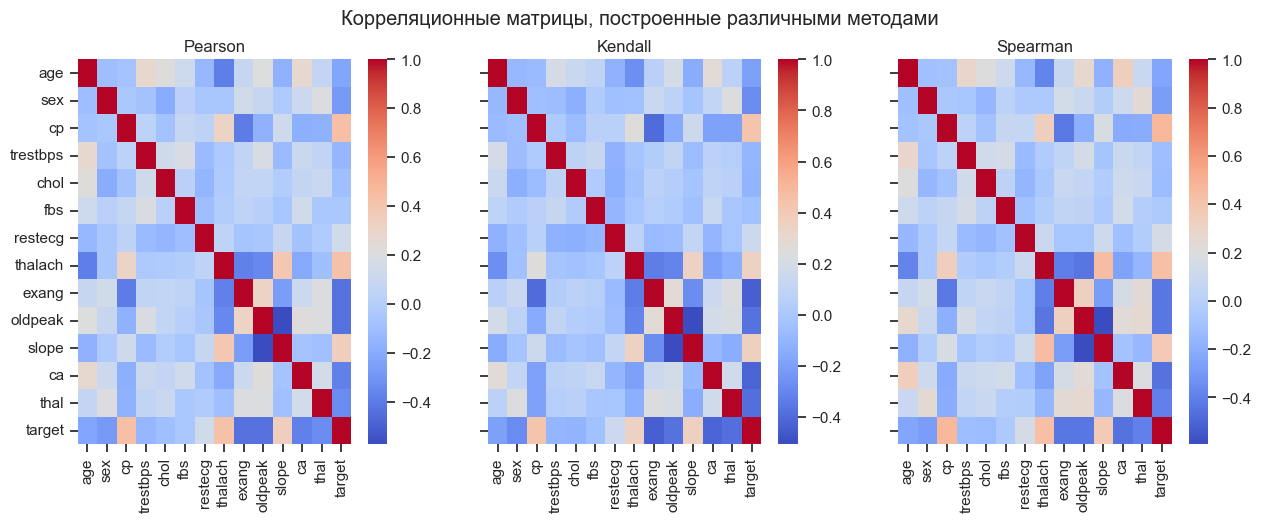

In [12]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], cmap="coolwarm", annot=False, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], cmap="coolwarm", annot=False, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], cmap="coolwarm", annot=False, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

## Выводы

Модель можно построить.

Мы видим, что признак fbs имеет самую слабую связь (-0.04) с целевым признаком. Значит, его можно не включать в модель. 

Значение корреляции всех признаков с целевым достаточно мало, но все же оценим их вклад в модель.

**Признаки, вклад которых незначителен (слабая корреляция):**  
trestbps, chol, restecg  

**Признаки, вклад которых имеет значение:** 
age, sex  

**Наиболее значимые признаки:** 
cp, thalach, exang, oldpeak, slope, ca, thal  

Нет нецелевых признаков, которые имеют сильную связь между собой (наиболее сильная связь м/у slope и olpeak = -0.58)